In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report

In [2]:
# Load data
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Check datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [5]:
# Create_subset of the df
df_0 = df[df["isFraud"] == 0].sample(n=2500, random_state=42)
df_1 = df[df["isFraud"] == 1].sample(n=2500, random_state=42)

df = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,130,PAYMENT,12160.36,C222614294,29705.00,17544.64,M1421959804,0.00,0.00,0,0
1,285,TRANSFER,1421665.98,C1217403648,1421665.98,0.00,C483706610,0.00,0.00,1,0
2,269,TRANSFER,32527.00,C1930526816,32527.00,0.00,C1608920091,0.00,0.00,1,0
3,282,CASH_OUT,105096.40,C891513999,0.00,0.00,C1044461358,920591.56,1025687.96,0,0
4,161,TRANSFER,145582.83,C1747634582,70907.00,0.00,C1525913890,8502019.48,8647602.32,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,702,TRANSFER,240746.27,C1377043932,240746.27,0.00,C868639312,0.00,0.00,1,0
4996,40,CASH_IN,315332.63,C431432211,18976936.18,19292268.81,C988710621,471967.29,156634.66,0,0
4997,503,CASH_OUT,993088.06,C1414793795,993088.06,0.00,C1137450827,244746.61,1237834.66,1,0
4998,536,CASH_OUT,624686.04,C1226035706,624686.04,0.00,C1526048317,162545.17,787231.20,1,0


In [6]:
df.reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,130,PAYMENT,12160.36,C222614294,29705.00,17544.64,M1421959804,0.00,0.00,0,0
1,285,TRANSFER,1421665.98,C1217403648,1421665.98,0.00,C483706610,0.00,0.00,1,0
2,269,TRANSFER,32527.00,C1930526816,32527.00,0.00,C1608920091,0.00,0.00,1,0
3,282,CASH_OUT,105096.40,C891513999,0.00,0.00,C1044461358,920591.56,1025687.96,0,0
4,161,TRANSFER,145582.83,C1747634582,70907.00,0.00,C1525913890,8502019.48,8647602.32,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,702,TRANSFER,240746.27,C1377043932,240746.27,0.00,C868639312,0.00,0.00,1,0
4996,40,CASH_IN,315332.63,C431432211,18976936.18,19292268.81,C988710621,471967.29,156634.66,0,0
4997,503,CASH_OUT,993088.06,C1414793795,993088.06,0.00,C1137450827,244746.61,1237834.66,1,0
4998,536,CASH_OUT,624686.04,C1226035706,624686.04,0.00,C1526048317,162545.17,787231.20,1,0


In [7]:
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [8]:
# Dimensions
df.shape

(5000, 11)

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.00000,5000.00000
mean,304.749800,8.560636e+05,1.255212e+06,5.034456e+05,8.013754e+05,1.247969e+06,0.50000,0.00060
std,193.078266,1.891291e+06,3.049721e+06,2.299428e+06,2.401378e+06,2.876459e+06,0.50005,0.02449
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.00000
25%,159.000000,3.937024e+04,1.055400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.00000
50%,281.000000,1.779618e+05,1.293703e+05,0.000000e+00,0.000000e+00,1.428239e+05,0.50000,0.00000
75%,410.000000,5.680224e+05,8.546456e+05,0.000000e+00,5.261745e+05,1.148656e+06,1.00000,0.00000
max,743.000000,1.199796e+07,3.741827e+07,2.937475e+07,6.677827e+07,6.788014e+07,1.00000,1.00000


In [10]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False


df.isnull().sum()

<Axes: >

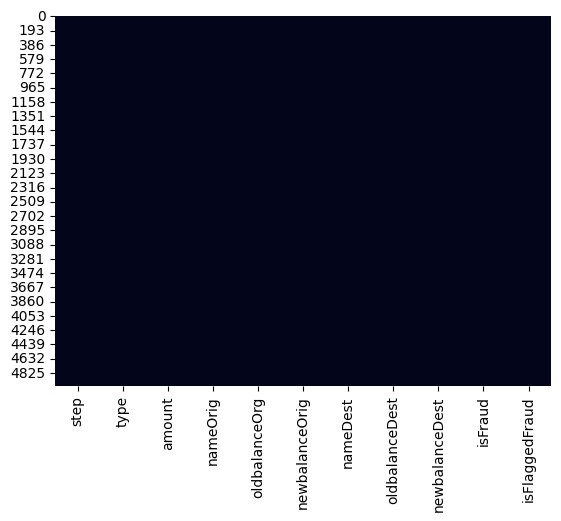

In [11]:
# Visualise missing values of the train dataset
sns.heatmap(df.isnull(), cbar=False)

# Explorative Analysis

In [12]:
df['isFraud'].value_counts()

isFraud
0    2500
1    2500
Name: count, dtype: int64

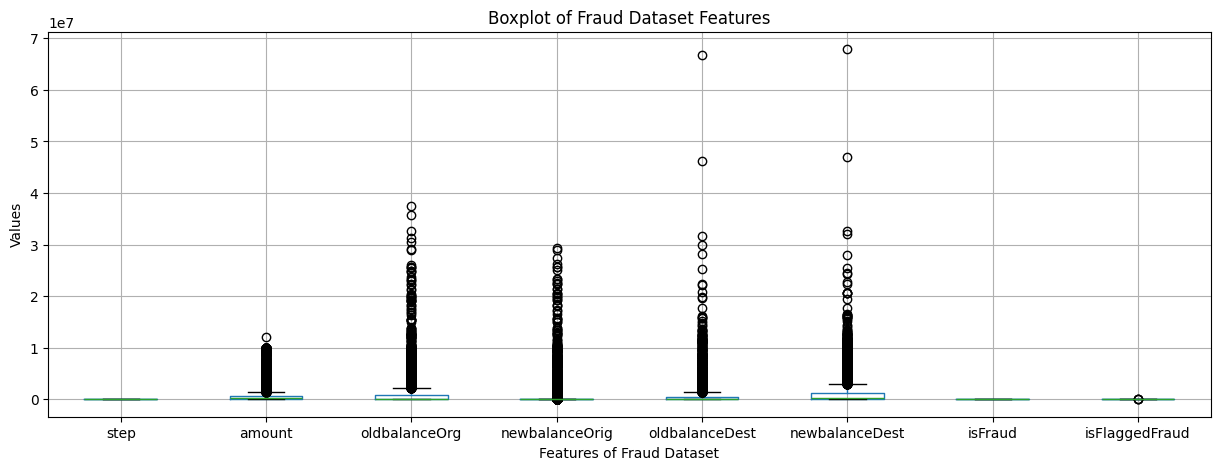

In [13]:
# Box plot to check for outliers for numerical columns
df.boxplot(figsize=(15,5))

# Add title and labels
plt.title('Boxplot of Fraud Dataset Features')
plt.xlabel('Features of Fraud Dataset')
plt.ylabel('Values')

plt.tight_layout
plt.show()


In [14]:
# Check "type" feature unique values
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [15]:
# Count unique values of "type" feature
df["type"].value_counts()

type
CASH_OUT    2196
TRANSFER    1413
PAYMENT      834
CASH_IN      542
DEBIT         15
Name: count, dtype: int64

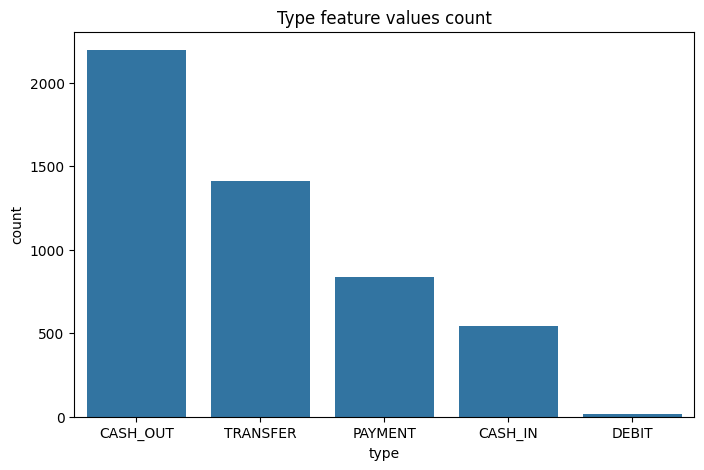

In [16]:
# Visualise
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order = df['type'].value_counts().index)

plt.title("Type feature values count")

plt.show()

In [17]:
# Label encode "type" variable column
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)
df


/var/folders/k7/895l0w6x2n7254pxsvvn0nyc0000gn/T/ipykernel_38628/1938349848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)
/var/folders/k7/895l0w6x2n7254pxsvvn0nyc0000gn/T/ipykernel_38628/1938349848.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,130,1,12160.36,C222614294,29705.00,17544.64,M1421959804,0.00,0.00,0,0
1,285,3,1421665.98,C1217403648,1421665.98,0.00,C483706610,0.00,0.00,1,0
2,269,3,32527.00,C1930526816,32527.00,0.00,C1608920091,0.00,0.00,1,0
3,282,0,105096.40,C891513999,0.00,0.00,C1044461358,920591.56,1025687.96,0,0
4,161,3,145582.83,C1747634582,70907.00,0.00,C1525913890,8502019.48,8647602.32,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,702,3,240746.27,C1377043932,240746.27,0.00,C868639312,0.00,0.00,1,0
4996,40,2,315332.63,C431432211,18976936.18,19292268.81,C988710621,471967.29,156634.66,0,0
4997,503,0,993088.06,C1414793795,993088.06,0.00,C1137450827,244746.61,1237834.66,1,0
4998,536,0,624686.04,C1226035706,624686.04,0.00,C1526048317,162545.17,787231.20,1,0


In [18]:
# Count each values in "type" column
df['type'].value_counts()

type
0    2196
3    1413
1     834
2     542
4      15
Name: count, dtype: int64

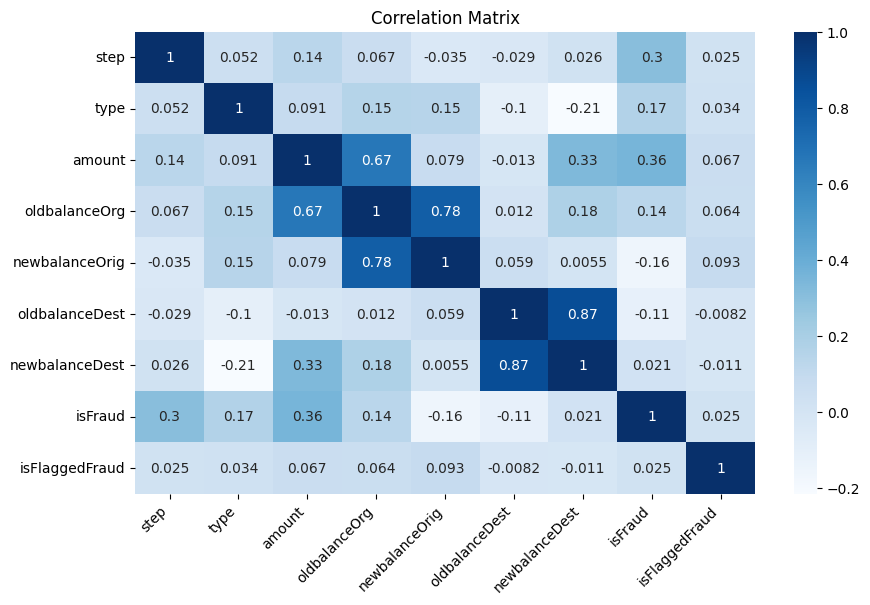

In [19]:
# Correlation mat
df_corr = df.loc[:, ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig' , 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

plt.figure(figsize=(10,6))
corr_mat = df_corr.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [20]:
# defining independent and dependent variables
x = df.drop(["isFraud", "nameOrig", "nameDest", "isFlaggedFraud"],axis=1)
y = df['isFraud']

In [21]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,130,1,12160.36,29705.00,17544.64,0.00,0.00
1,285,3,1421665.98,1421665.98,0.00,0.00,0.00
2,269,3,32527.00,32527.00,0.00,0.00,0.00
3,282,0,105096.40,0.00,0.00,920591.56,1025687.96
4,161,3,145582.83,70907.00,0.00,8502019.48,8647602.32
...,...,...,...,...,...,...,...
4995,702,3,240746.27,240746.27,0.00,0.00,0.00
4996,40,2,315332.63,18976936.18,19292268.81,471967.29,156634.66
4997,503,0,993088.06,993088.06,0.00,244746.61,1237834.66
4998,536,0,624686.04,624686.04,0.00,162545.17,787231.20


In [22]:
y

0       0
1       1
2       1
3       0
4       0
       ..
4995    1
4996    0
4997    1
4998    1
4999    0
Name: isFraud, Length: 5000, dtype: int64

In [23]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=23)

/Users/tes/.pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                             Standard Scaler  Min-Max Scaler  Robust Scaler
Logistic Regression                    0.873           0.773          0.812
Support Vector Machine                 0.884           0.851          0.618
Decision Tree (Gini)                   0.986           0.985          0.983
Decision Tree (Entropy)                0.986           0.986          0.986
Decision Tree (Max Depth=3)            0.929           0.929          0.929
Naive Bayes                            0.751           0.751          0.536
KNN (k=3)                              0.912           0.904          0.914


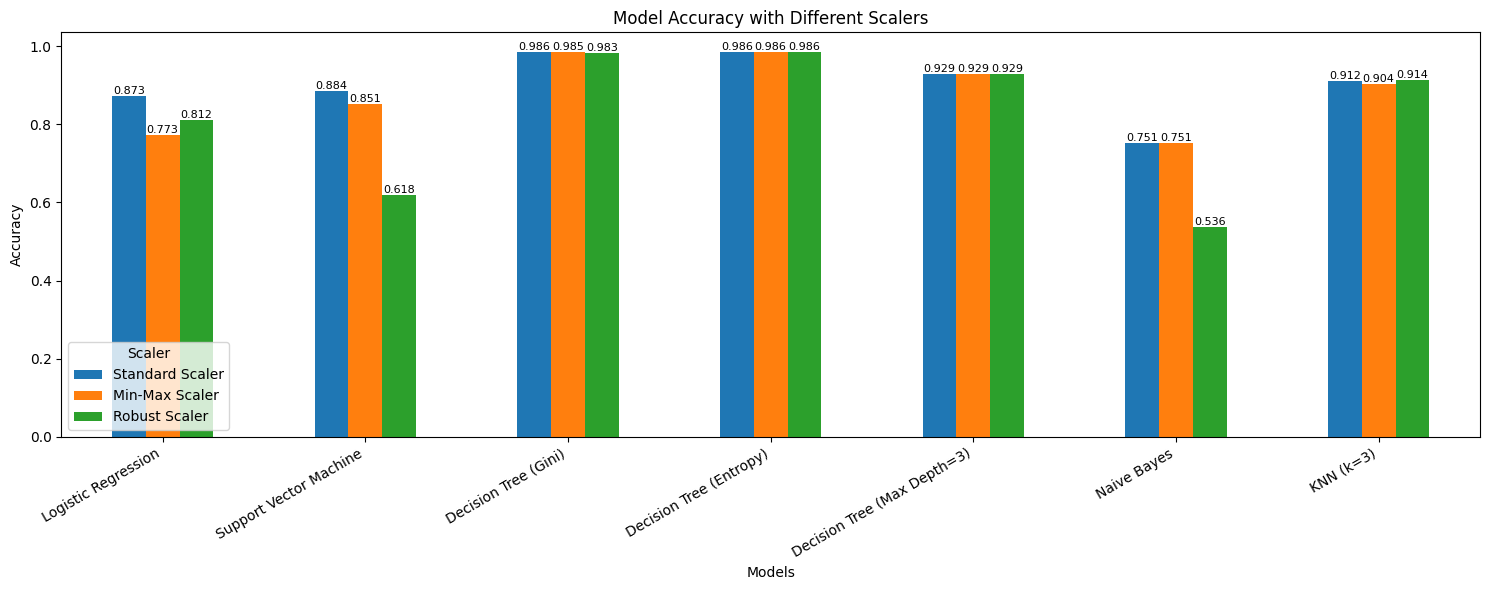

In [24]:
# Define scalers
scalers = {
    "Standard Scaler": StandardScaler(),
    "Min-Max Scaler": MinMaxScaler(),
    "Robust Scaler": RobustScaler()
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": svm.SVC(),
    "Decision Tree (Gini)": DecisionTreeClassifier(),
    "Decision Tree (Entropy)": DecisionTreeClassifier(criterion='entropy'),
    "Decision Tree (Max Depth=3)": DecisionTreeClassifier(max_depth=3),
    "Naive Bayes": GaussianNB(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
}

# Dictionary to store all results
all_results = {}

# Iterate through each scaler and evaluate models
for scaler_name, scaler in scalers.items():
    accuracy_scores = {}

    for model_name, model in models.items():
        if isinstance(model, DecisionTreeClassifier):
            # Trees don't require scaling, fit directly
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
        else:
            # Use pipeline for models that require scaling
            pipeline = Pipeline([
                ('scaler', scaler),
                ('model', model)
            ])
            pipeline.fit(X_train, y_train)
            predictions = pipeline.predict(X_test)

        accuracy_scores[model_name] = accuracy_score(y_test, predictions)
    
    all_results[scaler_name] = accuracy_scores

# Convert to DataFrame for plotting
results_df = pd.DataFrame(all_results)

# Print the results in tabular format
print(results_df)

# Plotting
ax = results_df.plot(kind='bar', figsize=(15, 6))
plt.title('Model Accuracy with Different Scalers')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=30, ha="right")
plt.legend(title="Scaler")

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()